# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading csv data to dataframe

In [2]:
data=pd.read_csv('/content/salary.csv')

# Checking data

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data preprocessing

## Checking null values in the data

In [4]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Corelation

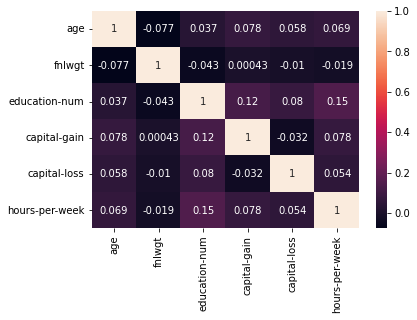

In [6]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True)

## Dealing with missing values

###Checking the columns

In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

### checking unique values in each column

In [8]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [9]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

**Removing '?' from the data**


In [10]:
data[data['workclass']==" ?"].index

Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1836)

**Replacing the ? with mode**

In [11]:
data['workclass'].mode()[0]


' Private'

In [12]:
data['workclass'].replace(' ?', ' Private', inplace=True)

In [13]:
data[data['workclass']==" ?"].index

Int64Index([], dtype='int64')

In [14]:
data['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

In [15]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
data['education'].nunique()

16

In [17]:
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [18]:
data['education-num'].nunique()

16

In [19]:
data['marital-status'].unique()


array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

**Checking index value for ? and replacing them with mode**

In [21]:
data[data['occupation']==" ?"].index

Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1843)

In [22]:
data['occupation'].mode()[0]

' Prof-specialty'

In [23]:
data['occupation']=data['occupation'].replace(' ?', ' Prof-specialty')


In [24]:
data[data['occupation']==" ?"].index

Int64Index([], dtype='int64')

In [25]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
data['relationship'].unique()


array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [27]:
data['race'].unique()


array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [28]:
data['sex'].unique()


array([' Male', ' Female'], dtype=object)

In [29]:
data['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [30]:
data['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [31]:
data['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [32]:
data['native-country'].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [33]:
data[data['native-country']==" ?"].index


Int64Index([   14,    38,    51,    61,    93,   245,   249,   297,   393,
              453,
            ...
            32213, 32232, 32254, 32307, 32413, 32449, 32469, 32492, 32510,
            32525],
           dtype='int64', length=583)

In [34]:
data['native-country'].mode()[0]


' United-States'

In [35]:
data['native-country']=data['native-country'].replace(' ?', ' United-States')

In [36]:
data[data['native-country']==" ?"].index

Int64Index([], dtype='int64')

In [37]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Encoding

###one hot encoding of salary

In [39]:
data['salary'] = pd.get_dummies(data['salary'], prefix='salary', drop_first=True)

In [40]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### One hot encoding of sex

In [41]:
data['sex'] = pd.get_dummies(data['sex'], prefix='sex', drop_first=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


### one hot encoding of workclass and dropping the column from dataframe

In [42]:
wc=pd.get_dummies(data['workclass'], prefix='workclass')
data.drop('workclass',axis=1,inplace=True)
data.head()

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


### one hot encoding of workclass and dropping the column from dataframe

In [43]:
ms=pd.get_dummies(data['marital-status'], prefix='marital-status')
data.drop('marital-status',axis=1,inplace=True)
data.head()

,age,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,77516,Bachelors,13,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,83311,Bachelors,13,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,234721,11th,7,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,338409,Bachelors,13,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


### one hot encoding of occupation and dropping the column from dataframe

In [44]:
occupation=pd.get_dummies(data['occupation'], prefix='occupation')
data.drop('occupation',axis=1,inplace=True)
data.head()

,age,fnlwgt,education,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,77516,Bachelors,13,Not-in-family,White,1,2174,0,40,United-States,0
1,50,83311,Bachelors,13,Husband,White,1,0,0,13,United-States,0
2,38,215646,HS-grad,9,Not-in-family,White,1,0,0,40,United-States,0
3,53,234721,11th,7,Husband,Black,1,0,0,40,United-States,0
4,28,338409,Bachelors,13,Wife,Black,0,0,0,40,Cuba,0


### one hot encoding of relationship and dropping the column from dataframe

In [45]:
relationship=pd.get_dummies(data['relationship'], prefix='relationship')
data.drop('relationship',axis=1,inplace=True)
data.head()

,age,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,77516,Bachelors,13,White,1,2174,0,40,United-States,0
1,50,83311,Bachelors,13,White,1,0,0,13,United-States,0
2,38,215646,HS-grad,9,White,1,0,0,40,United-States,0
3,53,234721,11th,7,Black,1,0,0,40,United-States,0
4,28,338409,Bachelors,13,Black,0,0,0,40,Cuba,0


### one hot encoding of race and dropping the column from dataframe

In [46]:
race=pd.get_dummies(data['race'], prefix='race')
data.drop('race',axis=1,inplace=True)
data.head()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,77516,Bachelors,13,1,2174,0,40,United-States,0
1,50,83311,Bachelors,13,1,0,0,13,United-States,0
2,38,215646,HS-grad,9,1,0,0,40,United-States,0
3,53,234721,11th,7,1,0,0,40,United-States,0
4,28,338409,Bachelors,13,0,0,0,40,Cuba,0


### one hot encoding of native-country and dropping the column from dataframe

In [47]:
country=pd.get_dummies(data['native-country'], prefix='native-country')
data.drop('native-country',axis=1,inplace=True)
data.head()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,Bachelors,13,1,2174,0,40,0
1,50,83311,Bachelors,13,1,0,0,13,0
2,38,215646,HS-grad,9,1,0,0,40,0
3,53,234721,11th,7,1,0,0,40,0
4,28,338409,Bachelors,13,0,0,0,40,0


## Feature reduction

In [48]:
data=data.drop('education',axis=1)

In [49]:
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,1,2174,0,40,0
1,50,83311,13,1,0,0,13,0
2,38,215646,9,1,0,0,40,0
3,53,234721,7,1,0,0,40,0
4,28,338409,13,0,0,0,40,0


# Concatenating the one hot encoded dataframes into the main dataframe

In [50]:
data1=pd.concat([data,wc,ms,occupation,relationship,race,country],axis=1)
data1.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,1,2174,0,40,0
1,50,83311,13,1,0,0,13,0
2,38,215646,9,1,0,0,40,0
3,53,234721,7,1,0,0,40,0
4,28,338409,13,0,0,0,40,0


# Splitting into Features(X) and Target(Y)

In [52]:
X=data1.drop('salary',axis=1)
y=data1['salary']

# Splitting data into test and Train dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## checking the shape of each 

In [54]:
X_train.shape, X_test.shape

((24420, 88), (8141, 88))

In [55]:
y_train.shape, y_test.shape

((24420,), (8141,))

# **DecisionTree**

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)


DecisionTreeClassifier()

##Predicting the model using testdata

In [57]:
y_pred=tree.predict(X_test)

##Calculating the accuracy score

In [58]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8173443065962412


# **Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8620562584449085


# **Bagging Classifiers**

In [60]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=250, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8598452278589854


# **Boosting Classifiers**

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train)
y_pred = ada_boost_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.872251566146665


# ****Removing the corelated columns and checking accuracy score for decision tree,Random forest,Bagging and boosting model****

In [62]:
plt.figure(figsize=(150,150))
sns.heatmap(data1.corr(),annot = True)

relationship_ Husband and marital-status_ Married-civ-spouse are highly corelated




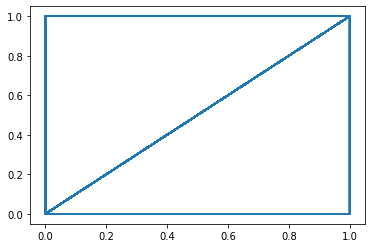

In [63]:
plt.plot(data1['relationship_ Husband'],data1['marital-status_ Married-civ-spouse'])

In [64]:
data1[['relationship_ Husband', 'marital-status_ Married-civ-spouse']]

,relationship_ Husband,marital-status_ Married-civ-spouse
0,0,0
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
32556,0,1
32557,1,1
32558,0,0
32559,0,0


# Creating a new dataframe

In [65]:
data2=data1.drop('marital-status_ Married-civ-spouse',axis=1)


# Splitting dataframe into features and target

In [66]:
X=data2.drop(['salary'],axis=1)
y=data2['salary']

# Spliting data into train and test** **bold text

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **DecisionTree**

In [68]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8140277607173566


# **Random Forest**

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8611964132170495


# **Bagging classifier**

In [70]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8589853826311264


# **Boosting classifier**

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train)
y_pred = ada_boost_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8733570814396265
